Bohao Hu #33131277 Leanne Su #55285753 Grady Chen #18865568

The Angle of the Slope between Subset 1 and Subset 2 is 69.47 degrees.
The Angle of the Slope between Subset 3 and Subset 3 is 44.96 degrees.


(-1000.0, 1000.0)

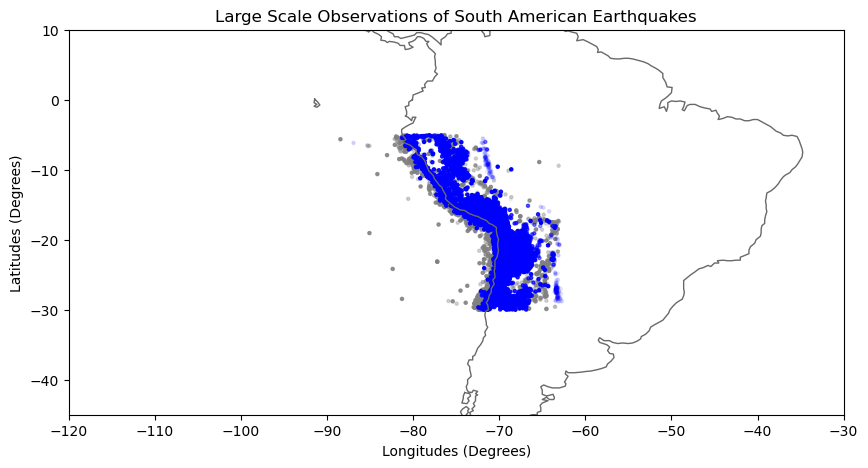

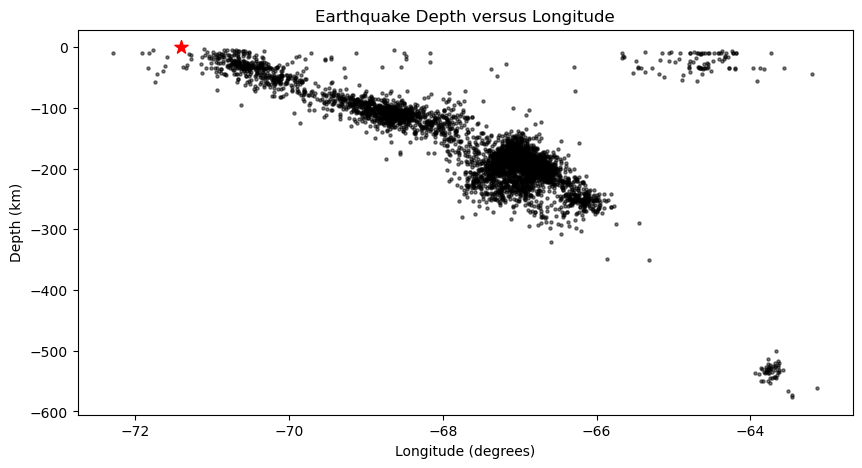

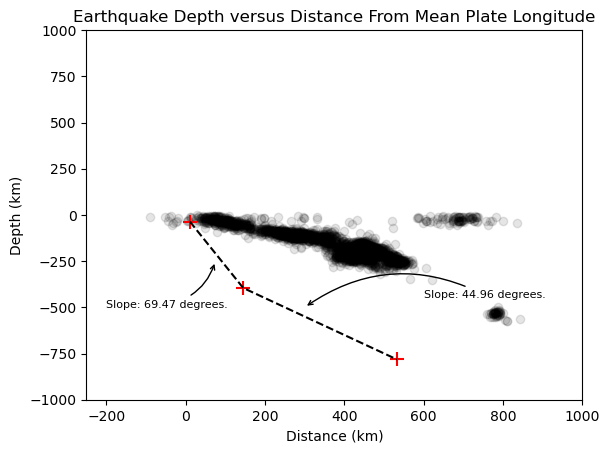

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import earthquake_fns as eq
import math
from datetime import datetime
import warnings

#==========================================================================================

warnings.filterwarnings("ignore", category=UserWarning) #FRANCIS SAID IT WAS FINE
longitudes, latitudes = eq.get_coastlines("./m_coasts.csv")
pb_dict = eq.get_plate_boundaries("./all_boundaries.csv")
earthquakes = eq.get_earthquakes("./IRIS_eq_010100_112422_mag4.csv")
lats, lons, depths, magnitudes, times = eq.parse_earthquakes_to_np(earthquakes)

#==========================================================================================

peru_chile_trench_shallow = eq.select_quake_subset(earthquakes, 
                                        [np.min(times), np.max(times)], 
                                        [-90, -60], 
                                        [-30, -5],
                                        [np.min(depths), 49],
                                        [np.min(magnitudes), np.max(magnitudes)])
peru_chile_trench_deep = eq.select_quake_subset(earthquakes, 
                                        [np.min(times), np.max(times)], 
                                        [-90, -60], 
                                        [-30, -5],
                                        [50, np.max(depths)],
                                        [np.min(magnitudes), np.max(magnitudes)])
lats_s, lons_s, depths_s, mag_s, times_s = eq.parse_earthquakes_to_np(peru_chile_trench_shallow)
lats_d, lons_d, depths_d, mag_d, times_d = eq.parse_earthquakes_to_np(peru_chile_trench_deep)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(longitudes, latitudes, color='dimgrey', linewidth=1)

#do we need to plot the nazca plate boundary? I can do it

colour_by_depth_shallow = (depths_s - np.min(depths_s)) / (np.max(depths_s) - np.min(depths_s)) #colouring by depth
colour_by_depth_deep = (depths_d - np.min(depths_d)) / (np.max(depths_d) - np.min(depths_d))

alphas_s = 1 - colour_by_depth_shallow
alphas_d = 1 - colour_by_depth_deep

ax.scatter(lons_s, lats_s, color = 'grey', s = 5, alpha = alphas_s)
ax.scatter(lons_d, lats_d, color = 'blue', s = 5, alpha = alphas_d) 
ax.set_xlabel("Longitudes (Degrees)")
ax.set_ylabel("Latitudes (Degrees)")
ax.set_title("Large Scale Observations of South American Earthquakes")
ax.set_xlim(-120, -30)
ax.set_ylim(-45, 10)

#============================================================================================

nazca_plate = eq.select_quake_subset(earthquakes, 
                                  [np.min(times), np.max(times)], 
                                  [-75, -60], 
                                  [-25, -22], 
                                  [np.min(depths), np.max(depths)],
                                  [np.min(magnitudes), np.max(magnitudes)])
lats, lons, depths, mag, times = eq.parse_earthquakes_to_np(nazca_plate)

fig2, ax2 = plt.subplots(figsize=(10, 5))

ax2.scatter(lons, depths * -1, c = "black", alpha = 0.5, s = 5)
ax2.scatter(-71.4 , 0, marker = "*", s = 100, c= "red")
ax2.set_xlabel("Longitude (degrees)")
ax2.set_ylabel("Depth (km)")
ax2.set_title("Earthquake Depth versus Longitude")

#============================================================================================

one_longitude = 2 * np.pi * 6371 * np.cos(np.deg2rad(np.mean(lats)))/ 360
distances = (lons - (-71.4)) * one_longitude
#print(lons.shape, distances.shape)

s_american_earthquakes_select_i = eq.select_quake_subset(nazca_plate, 
                                      [np.min(times), np.max(times)], 
                                      [np.min(lons), np.max(lons)], 
                                      [np.min(lats), np.max(lats)], 
                                      [np.min(depths), 20],
                                      [np.min(magnitudes), np.max(magnitudes)])
lats_i, lons_i, depths_i, mag_i, times_i = eq.parse_earthquakes_to_np(s_american_earthquakes_select_i)

dist_i = np.where(((lons_i - (-71.4)) * one_longitude) <= 50)[0]

med_i = (np.median(depths_i), np.median((lons_i[dist_i] - (-71.4)) * one_longitude))
x_1 = med_i[0]
y_1 = med_i[1]

#============================================================================================
s_american_earthquakes_select_ii = eq.select_quake_subset(nazca_plate, 
                                      [np.min(times), np.max(times)], 
                                      [np.min(lons), np.max(lons)], 
                                      [np.min(lats), np.max(lats)], 
                                      [140, 150],
                                      [np.min(magnitudes), np.max(magnitudes)])
lats_ii, lons_ii, depths_ii, mag_ii, times_ii = eq.parse_earthquakes_to_np(s_american_earthquakes_select_ii)
med_ii = (np.median(depths_ii), np.median((lons_ii - (-71.4)) * one_longitude))
x_2 = med_ii[0]
y_2 = med_ii[1]

#============================================================================================
s_american_earthquakes_select_iii = eq.select_quake_subset(nazca_plate, 
                                      [np.min(times), np.max(times)], 
                                      [np.min(lons), np.max(lons)], 
                                      [np.min(lats), np.max(lats)], 
                                      [500, np.max(depths)],
                                      [np.min(magnitudes), np.max(magnitudes)])
lats_iii, lons_iii, depths_iii, mag_iii, times_iii = eq.parse_earthquakes_to_np(
    s_american_earthquakes_select_iii)
med_iii = (np.median(depths_iii), np.median((lons_iii - (-71.4)) * one_longitude))
x_3 = med_iii[0]
y_3 = med_iii[1]
#print(med_i, med_ii, med_iii)

slope_1to2 = eq.get_slope(med_i, med_ii)
slope_2to3 = eq.get_slope(med_ii, med_iii)
print(f'The Angle of the Slope between Subset 1 and Subset 2 is {slope_1to2:.2f} degrees.') #just change the rounding to fucking whatever
print(f'The Angle of the Slope between Subset 3 and Subset 3 is {slope_2to3:.2f} degrees.')

#============================================================================================

fig3, ax3 = plt.subplots()
ax3.scatter(distances, depths * -1, c = "black", alpha = 0.10) #flipped
ax3.scatter(x_1 , (y_1 * -1), marker = "+", s = 100, c= "red")
ax3.scatter(x_2 , (y_2 * -1), marker = "+", s = 100, c= "red")
ax3.scatter(x_3 , (y_3 * -1), marker = "+", s = 100, c= "red")

ax3.plot([x_1, x_2, x_3],
        [(y_1 * -1), (y_2 * -1), (y_3 * -1)],
        linestyle='--', color='black')
ax3.annotate(f'Slope: {slope_1to2:.2f} degrees.', xy=(75, -250), xytext=(-200, -500),
                 arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3,rad=0.3'), fontsize = 8)

ax3.annotate(f'Slope: {slope_2to3:.2f} degrees.', xy=(300, -500), xytext=(600,-450),
                 arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3,rad=0.3'), fontsize = 8)
ax3.set_xlabel("Distance (km)")
ax3.set_ylabel("Depth (km)")
ax3.set_title("Earthquake Depth versus Distance From Mean Plate Longitude")
ax3.set_xlim(-250, 1000)
ax3.set_ylim(-1000, 1000)

## Observations and Discussion


### From C1.3:  Three observations from your map (shallow and deep seismicity along western S. America):
Shallow earthquakes are far more widely distributed. Though they are mainly focused on the plate boundaries, they are sporadically distributed.
By comparison, deeper earthquakes are far more centrally localized and make up the borders of the plate boundary.
Generally, it appears that the deeper subset is far more frequent, suggesting high magnitudes of seismic activity.
<br><br><br>




### From C2.3:  Three observations from your longitude-depth plot
Depth increases as longitude moves away from the average plate boundary. Frequency also increases as longitude moves away from the average plate boundary.
Linearity of both the depth-longitude and frequency-longitude relationships suggest that there should be data between -66 and -64. There may be some external factor preventing seismic activity in that area.
<br><br><br>





### From C3.4: Discussion (2-3 sentences max) of results from your calculations of dip of the subducting slab:
Yes, this makes sense. A steeper subduction plate is generally correlated with shallower earthquake depths, while a less steep angle is correlated with deeper earthquake depths. This is reflected in the plot, where the trend of earthquake depths increases in the x-axis area of the shallower slope. Curiously, steeper slopes theoretically lead to higher seismic activity and more frequency earthquakes, but this plot represents the opposite effect.
<br><br><br>



